## Case study on Applied Statistics

### Problem Domain - Healthcare & Insurance

### Context:

In this use-case you need to explore the medical cost of people characterised by certian attributes.

You need to come up with some insights by which we can make use of customer information to improve the business performance.

### Attribute Information
* **`Customer age last birthday`**: age of primary beneficiary
* **`Gender of customer`**: insurance contractor gender, female, male
* **`Body Mass`**: Body mass index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9
* **`Kids`**: Number of children covered by health insurance / Number of dependents
* **`Is he a smoker`**: Smoking
* **`Regional Information`**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest
* **`Cost`**: Individual medical costs billed by health insurance.

### Your Exploratory Data Analysis should contain following information

* **`Data type of each attribute`**: 
* **`Checking the presence of missing values`**: 
* **`Five point summary of numerical attributes`**: 
* **`3M Analysis - Mean, Median, Mode `**: 
* **`Detection of outliers using - Boxplot, Scatter Plot, Z-Score and IQR Score`**: 
* **`Distribution of every categorical features`**: 
* **`Cross Tabulation - eg. smoker and age `**: 


### Hypothesis testing for statistical evidence 

* **`1`**:Do charges of people who smoke differs significantly from the people who don't
* **`2`**:Does bmi of males differ significantly from that of females?
* **`3`**:Is the proportion of smokers significantly different in different genders? 
* **`4`**:Independenec of Males & Females
* **`5`**:Is the distribution of bmi across women with no children, one child and two children, the same? 



## Describing the categorical features
### Customer Age - Numerical
### Gender - Categorical Nominal
### Body Mass - Numerical
### Kids - Numerical
### Is he smoker - Binary
### Regional Info - Categorical Nominal
### Cost - Numerical

In [1]:
## Step 1: Importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

## Importing statistical libraries
import scipy.stats as scipy_stats
from scipy import stats

In [2]:
## Step 2: Importing the datasets
df = pd.read_csv("data222.csv")

In [3]:
df.head()

,Customer Age,Gender,Body Mass,Kids,Is he smoker,Regional Info,Cost
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552


In [4]:
## Step 3: Transforming the data types of the numerical variables to int or float
## 'Body Mass' is alread observed to ve float dtype.
## It can be observed that there are uneven number of values in each of the features.
## Also the dtype of the numerical variables is observed to be as "Object". This should be changed to either "float" or "int"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
Customer Age     1338 non-null object
Gender           1321 non-null object
Body Mass        1323 non-null float64
Kids             1326 non-null object
Is he smoker     1329 non-null object
Regional Info    1332 non-null object
Cost             1330 non-null object
dtypes: float64(1), object(6)
memory usage: 73.3+ KB


In [5]:
df['Customer Age'].value_counts()

18             69
19             68
46             29
47             29
45             29
20             29
50             29
51             29
52             29
48             29
49             28
22             28
27             28
28             28
54             28
25             28
26             28
24             28
53             28
23             28
21             28
41             27
40             27
31             27
29             27
44             27
43             27
42             27
30             27
32             26
33             26
56             26
57             26
55             26
34             26
38             25
35             25
37             25
36             25
58             25
39             25
59             25
62             23
63             23
61             23
60             23
64             21
sdfdsfsdfsf     1
Name: Customer Age, dtype: int64

In [6]:
## Removing the gibberish text from the "Customer Age column"
df1=df[df['Customer Age'].apply(lambda x: x.isnumeric())]

In [7]:
## Transforming the data type of "Customer Age" to int
df1['Customer Age'] = df1['Customer Age'].astype(int)

C:\Users\Abhik Bhattacharya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
## We can observe that the 'Customer Age' dtype has now changed from 'object' to 'int'
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
Customer Age     1337 non-null int32
Gender           1320 non-null object
Body Mass        1322 non-null float64
Kids             1325 non-null object
Is he smoker     1328 non-null object
Regional Info    1331 non-null object
Cost             1329 non-null object
dtypes: float64(1), int32(1), object(5)
memory usage: 78.3+ KB


In [9]:
## Removing the text data from the "Kids column"
## df1 = df1[df1['Kids'].apply(lambda x: x.isnumeric())]


In [10]:
## Transforming the 'Kids' dtype from 'object' to 'float'
df1['Kids'].value_counts()
## We can see below that there is a text entry in the "Kids" record as well.

0       569
1       321
2       234
3       157
4        25
5        18
Five      1
Name: Kids, dtype: int64

In [11]:
## Filtering the text feature from the 'Kids' record
df1[df1["Kids"]=="Five"]

,Customer Age,Gender,Body Mass,Kids,Is he smoker,Regional Info,Cost
407,47,female,23.6,Five,no,southwest,8539.671


In [12]:
## Removing this row from the record
df1 = df1.drop(407,axis=0)

In [13]:
## We can observe that the text data has been removed from the data set now
df1["Kids"].value_counts()

0    569
1    321
2    234
3    157
4     25
5     18
Name: Kids, dtype: int64

In [14]:
#df1 = df1[df1['Kids'].apply(lambda x: x.isnumeric())]

In [15]:
## The dtype of "Kids" feature is 'object' and it needs to be transformed to 'float'
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 0 to 1337
Data columns (total 7 columns):
Customer Age     1336 non-null int32
Gender           1319 non-null object
Body Mass        1321 non-null float64
Kids             1324 non-null object
Is he smoker     1327 non-null object
Regional Info    1330 non-null object
Cost             1328 non-null object
dtypes: float64(1), int32(1), object(5)
memory usage: 78.3+ KB


In [16]:
## We can see below the 'Kids' data type has been transformed to 'float'
df1['Kids'] = df1['Kids'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 0 to 1337
Data columns (total 7 columns):
Customer Age     1336 non-null int32
Gender           1319 non-null object
Body Mass        1321 non-null float64
Kids             1324 non-null float64
Is he smoker     1327 non-null object
Regional Info    1330 non-null object
Cost             1328 non-null object
dtypes: float64(2), int32(1), object(4)
memory usage: 78.3+ KB


In [17]:
## There is text values in the "Cost Feature as well"
df1[df1["Cost"]=="NONE"]

,Customer Age,Gender,Body Mass,Kids,Is he smoker,Regional Info,Cost
388,26,female,22.61,0.0,no,northwest,NONE


In [18]:
## Dropping the entire record with the text value from the dataset
df1 = df1.drop(388,axis=0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
Customer Age     1335 non-null int32
Gender           1318 non-null object
Body Mass        1320 non-null float64
Kids             1323 non-null float64
Is he smoker     1326 non-null object
Regional Info    1329 non-null object
Cost             1327 non-null object
dtypes: float64(2), int32(1), object(4)
memory usage: 78.2+ KB


In [19]:
#df1 = df1[df1['Cost'].apply(lambda x: x.isnumeric())]

In [20]:
## Converting the Cost dtype from object to float
df1['Cost'] = df1['Cost'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
Customer Age     1335 non-null int32
Gender           1318 non-null object
Body Mass        1320 non-null float64
Kids             1323 non-null float64
Is he smoker     1326 non-null object
Regional Info    1329 non-null object
Cost             1327 non-null float64
dtypes: float64(3), int32(1), object(3)
memory usage: 78.2+ KB


In [21]:
## Imputing the nullvalues with Mode
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent',verbose= 0)
imputer = imputer.fit(df1)
df1 = imputer.transform(df1)

In [22]:
df1 = pd.DataFrame(df1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 7 columns):
0    1335 non-null object
1    1335 non-null object
2    1335 non-null object
3    1335 non-null object
4    1335 non-null object
5    1335 non-null object
6    1335 non-null object
dtypes: object(7)
memory usage: 73.1+ KB


In [23]:
## Setting the column labels back to the original
df1.columns = ["Customer Age","Gender","Body Mass","Kids","Is he smoker","Regional Info","Cost"]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 7 columns):
Customer Age     1335 non-null object
Gender           1335 non-null object
Body Mass        1335 non-null object
Kids             1335 non-null object
Is he smoker     1335 non-null object
Regional Info    1335 non-null object
Cost             1335 non-null object
dtypes: object(7)
memory usage: 73.1+ KB


In [24]:
df1['Customer Age'] = df1['Customer Age'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 7 columns):
Customer Age     1335 non-null int32
Gender           1335 non-null object
Body Mass        1335 non-null object
Kids             1335 non-null object
Is he smoker     1335 non-null object
Regional Info    1335 non-null object
Cost             1335 non-null object
dtypes: int32(1), object(6)
memory usage: 67.9+ KB


In [25]:
df1['Kids'] = df1['Kids'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 7 columns):
Customer Age     1335 non-null int32
Gender           1335 non-null object
Body Mass        1335 non-null object
Kids             1335 non-null float64
Is he smoker     1335 non-null object
Regional Info    1335 non-null object
Cost             1335 non-null object
dtypes: float64(1), int32(1), object(5)
memory usage: 67.9+ KB


In [26]:
df1['Cost'] = df1['Cost'].astype(float)
df1['Body Mass'] = df1['Body Mass'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 7 columns):
Customer Age     1335 non-null int32
Gender           1335 non-null object
Body Mass        1335 non-null float64
Kids             1335 non-null float64
Is he smoker     1335 non-null object
Regional Info    1335 non-null object
Cost             1335 non-null float64
dtypes: float64(3), int32(1), object(3)
memory usage: 67.9+ KB


In [27]:
## Step 4: Performing Encoding for the categorical varibles
## From the dataset, the categories in the different features can be identified by using the custom summary function below
def IdentifyCategories(df1):
    for x in list(df1.columns):
        if df1[x].dtype == 'O':
            print("=======================================================================")
            print(f'number of unique categories present in {x} are {len(df[x].unique())}')
            print(f'following other categories: \n\n {df[x].unique()} \n\n\n')
            print("========================================================================")

In [28]:
IdentifyCategories(df1)

number of unique categories present in Gender are 3
following other categories: 

 ['female' 'male' nan] 



number of unique categories present in Is he smoker are 3
following other categories: 

 ['yes' 'no' nan] 



number of unique categories present in Regional Info are 5
following other categories: 

 ['southwest' 'southeast' 'northwest' 'northeast' nan] 





In [29]:
df1["Gender"].value_counts()

male      686
female    649
Name: Gender, dtype: int64

In [30]:
df1["Is he smoker"].value_counts()

no     1064
yes     271
Name: Is he smoker, dtype: int64

In [31]:
## We shall now perform the Label Encoding for "Is he smoker" feature, since it is binary
replace_values = {'Is he smoker': {'yes':1 ,'no':0}}
df1 = df1.replace(replace_values)
df1.head()

,Customer Age,Gender,Body Mass,Kids,Is he smoker,Regional Info,Cost
0,19,female,27.900,0.0,1,southwest,16884.92400
1,18,male,33.770,1.0,0,southeast,1725.55230
2,28,male,33.000,3.0,0,southeast,4449.46200
3,33,male,22.705,0.0,0,northwest,21984.47061
4,32,male,28.880,0.0,0,northwest,3866.85520


In [32]:
df_new = df1.copy()

In [33]:
## Writing a user defined function to perform a one hot encoding for the other nominal variables namely,Gender and Regional Info
## Performing one hot encoding for the nominal variables
def OneHOTEncoder_cum_frequencyencoder(data,column,top_n=5):
    flag = 0
    for col in list(data.columns):
        if column == col:
            flag = 1
            break
    if flag == 1:
        
        unique_names= data[column].value_counts().head(top_n).index
        lenuv=len(unique_names)
        for cat in unique_names:
            data[column+'_'+cat]= np.where(data[column]== cat,1,0)
        data.drop(column,axis=1,inplace=True)
        return data
    else:
        print(f'No feature named {column} exist')

In [34]:
OneHOTEncoder_cum_frequencyencoder(df1,'Gender')

,Customer Age,Body Mass,Kids,Is he smoker,Regional Info,Cost,Gender_male,Gender_female
0,19,27.900,0.0,1,southwest,16884.92400,0,1
1,18,33.770,1.0,0,southeast,1725.55230,1,0
2,28,33.000,3.0,0,southeast,4449.46200,1,0
3,33,22.705,0.0,0,northwest,21984.47061,1,0
4,32,28.880,0.0,0,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...
1330,50,30.970,3.0,0,northwest,10600.54830,1,0
1331,18,31.920,0.0,0,northeast,2205.98080,0,1
1332,18,36.850,0.0,0,southeast,1629.83350,0,1
1333,21,25.800,0.0,0,southwest,2007.94500,0,1


In [35]:
## Performing the same for Regional Info as well
OneHOTEncoder_cum_frequencyencoder(df1,'Regional Info')

,Customer Age,Body Mass,Kids,Is he smoker,Cost,Gender_male,Gender_female,Regional Info_southeast,Regional Info_southwest,Regional Info_northwest,Regional Info_northeast
0,19,27.900,0.0,1,16884.92400,0,1,0,1,0,0
1,18,33.770,1.0,0,1725.55230,1,0,1,0,0,0
2,28,33.000,3.0,0,4449.46200,1,0,1,0,0,0
3,33,22.705,0.0,0,21984.47061,1,0,0,0,1,0
4,32,28.880,0.0,0,3866.85520,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1330,50,30.970,3.0,0,10600.54830,1,0,0,0,1,0
1331,18,31.920,0.0,0,2205.98080,0,1,0,0,0,1
1332,18,36.850,0.0,0,1629.83350,0,1,1,0,0,0
1333,21,25.800,0.0,0,2007.94500,0,1,0,1,0,0


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 11 columns):
Customer Age               1335 non-null int32
Body Mass                  1335 non-null float64
Kids                       1335 non-null float64
Is he smoker               1335 non-null int64
Cost                       1335 non-null float64
Gender_male                1335 non-null int32
Gender_female              1335 non-null int32
Regional Info_southeast    1335 non-null int32
Regional Info_southwest    1335 non-null int32
Regional Info_northwest    1335 non-null int32
Regional Info_northeast    1335 non-null int32
dtypes: float64(3), int32(7), int64(1)
memory usage: 78.3 KB


In [37]:
##Step5: Performing a basic EDA on the data using the custom defined function
def custom_summary(df):
    result = []

    for col in list(df.columns):
        stats = OrderedDict({'FeatureName': col,'count':df1[col].count(),'Datatype':df1[col].dtype,
                                 'Mean':round(df1[col].mean(),2),'SD':round(df1[col].std(),2),'Variance':round(df1[col].var(),2),
                                 'Min':round(df1[col].min(),2),'Q1':round(df1[col].quantile(0.25),2),'Median':round(df1[col].median(),2),
                                 'Q3':round(df1[col].quantile(0.75),2),'Max':round(df1[col].max(),2),'Range':round(df1[col].quantile(1),2)-round(df1[col].quantile(0),2),
                                 'IQR':round(df1[col].quantile(0.75),2)-round(df1[col].quantile(0.25),2),
                                 'Kurtosis':round(df1[col].kurt(),2),'Skewness':round(df1[col].skew(),2)})
        result.append(stats)
        if df[col].skew() < -1:
            sk_label = 'Highly Negatively Skewed'
        elif -1 <= df[col].skew() < -0.5:
            sk_label = 'Moderately Negatively skewed'
        elif -0.5 <= df[col].skew() < 0:
            sk_label = 'Fairly Symmetric(Negative)'  
        elif 0 <= df[col].skew() < 0.5:
            sk_label = 'Fairly Symmetric(Positive)'
        elif 0.5 <= df[col].skew() < 1:
            sk_label = 'Moderately Positively skewed'
        elif df[col].skew() > 1:
            sk_label = 'Highly Positively Skewed'
        else:
            sk_label = 'Error'        
        stats['Skewness Comment'] = sk_label
        Upper_limit = stats['Q3'] + (1.5 *stats['IQR'])
        Lower_limit = stats['Q1'] - (1.5 *stats['IQR'])
        if len([x for x in df[col] if x < Lower_limit or x > Upper_limit ]) > 1:
            Out_Label = 'Has Outlier'
        else:
            Out_Label = 'No Outlier'
        stats['Outlier comment'] = Out_Label
    resultdf = pd.DataFrame(data = result)
    return resultdf 

In [38]:
#custom_summary(df1)

In [39]:
## Performing EDA for the continuous numerical variable only
df2 = df1[['Customer Age','Body Mass','Kids','Cost']]
custom_summary(df2)

,FeatureName,count,Datatype,Mean,SD,Variance,Min,Q1,Median,Q3,Max,Range,IQR,Kurtosis,Skewness,Skewness Comment,Outlier comment
0,Customer Age,1335,int32,39.19,14.04,1.972100e+02,18.00,27.00,39.00,51.00,64.00,46.00,24.00,-1.25,0.06,Fairly Symmetric(Positive),No Outlier
1,Body Mass,1335,float64,30.68,6.07,3.681000e+01,15.96,26.32,30.50,34.54,53.13,37.17,8.22,-0.01,0.28,Fairly Symmetric(Positive),Has Outlier
2,Kids,1335,float64,1.09,1.21,1.460000e+00,0.00,0.00,1.00,2.00,5.00,5.00,2.00,0.22,0.95,Moderately Positively skewed,No Outlier
3,Cost,1335,float64,13250.50,12138.22,1.473364e+08,1121.87,4679.89,9361.33,16717.01,63770.43,62648.56,12037.12,1.59,1.51,Highly Positively Skewed,Has Outlier


In [40]:
## From the table shown above, we can conclude that 
## The "Customer Age" feature is a fairly symmetric but Platy kurtic curve and also the standard deviation is high
## The "Body Mass" feature is a roughly normally distributed feature which is a fairly symmetric 
## and mesokurtic curve distribution, standard deviation is not too high.
## The "Kids" feature is also roughly normally distributed feature with similar mean and median 
## and is mesokurtic and also moderately positively skewed and standard deviation is not high.
## The "Cost" is a highly skewed feature and it is leptokurtic with low standard deviation

In [41]:
## Step 6: Detection of Outliers
## Visualising the outliers using boxplot and histogram plots

In [42]:
def Outlierdetectionplots(df,col):
    
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,10))
    #col = 'cement'
    kwargs = {'fontsize':20,'color':'black'}
    ax1.set_title(col + " boxplot",**kwargs)
    ax1.set_xlabel('Box density',**kwargs)
    ax1.set_ylabel(col + ' values',**kwargs)
    sns.boxplot(df[col],ax=ax1, orient='v',color='green')

    # Plotting histogram with outliers
    sns.distplot(df[col],ax=ax2,color='blue',fit = scipy_stats.norm)
    ax2.axvline(df[col].mean(),color='green',linestyle= 'dashed')
    ax2.axvline(df[col].median(),color='black',linestyle= 'dashed')
    ax2.set_title(col + " Histogram with Outliers",**kwargs)
    ax2.set_xlabel('Density',**kwargs)
    ax2.set_ylabel(col + ' values',**kwargs) 

    # Plotting histogram without outliers
    upper_bound,lower_bound = np.percentile(df[col],[5,95])
    y = pd.DataFrame(np.clip(df[col],upper_bound,lower_bound)) #clip filters out the values less than 5% and more than 95%
    sns.distplot(y[col],ax=ax3,color = 'black',fit = scipy_stats.norm)
    ax3.axvline(df[col].mean(),color='green',linestyle= 'dashed')
    ax3.axvline(df[col].median(),color='black',linestyle= 'dashed')

    ax3.set_title(col + " Histogram without Outliers",**kwargs)
    ax3.set_xlabel(' Density',**kwargs)
    ax3.set_ylabel(col + ' values',**kwargs) 
    
    plt.show()

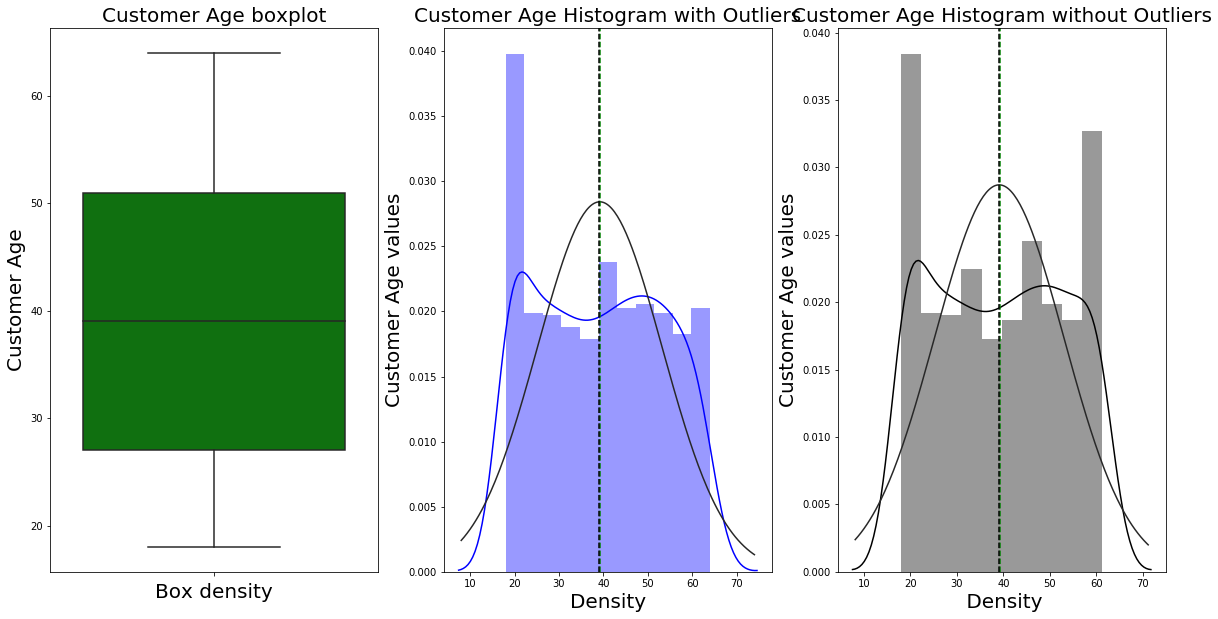

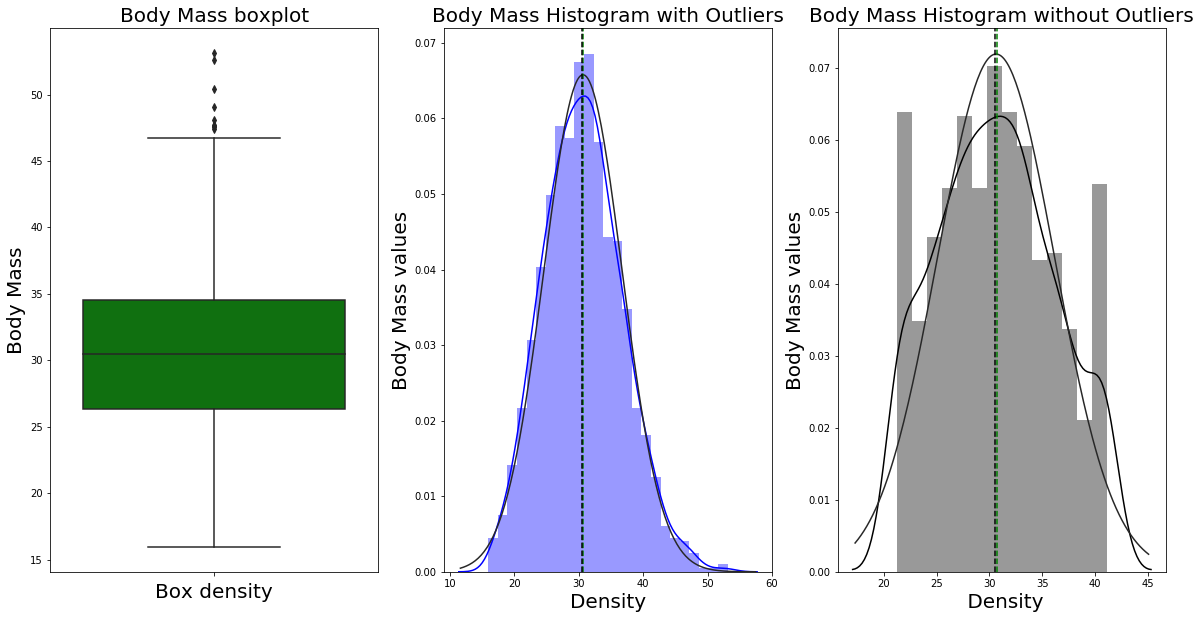

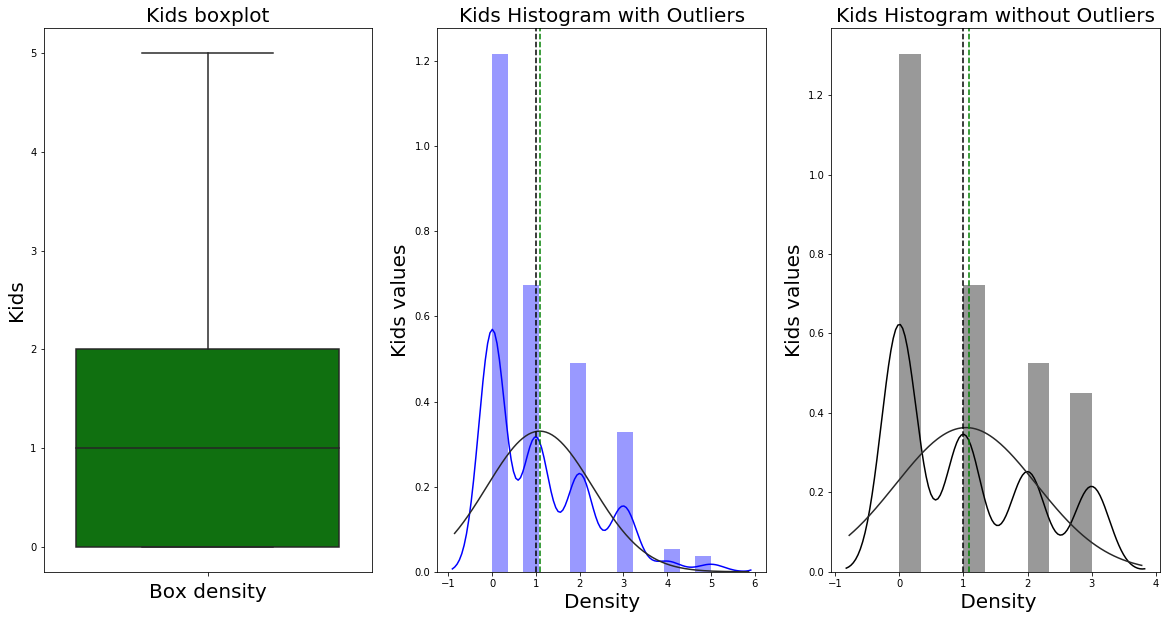

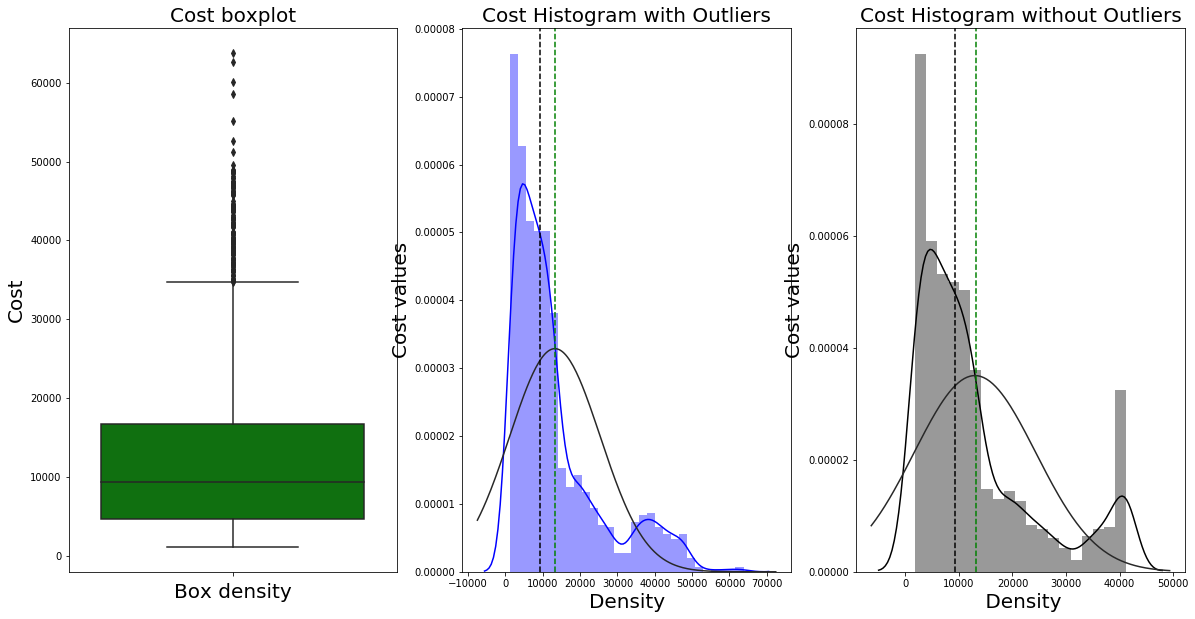

In [43]:
for col in list(df2.columns):
    Outlierdetectionplots(df2,col)

In [44]:
## It can be observed that "Body Mass" and "Cost" feature have outliers
df2_copy = df2.copy()

In [45]:
## Identifying Outliers with the help of Standard deviation and IQR
def ReplaceOutliers(df,col,method = 'Std',strategy = 'median'):
    if method == 'Std':
        col_mean,col_std,col_Q2 = df2_copy[col].mean(),df2_copy[col].std(),df2_copy[col].median()
        cut_off = col_std*2
        lowerlim,upperlim = col_mean-cut_off,col_mean+cut_off
        print(f'Outlier for {col} are:',np.sort([x for x in df2_copy[col]if x<lowerlim or x>upperlim]),'\n')

        # Replacing outliers with mean or median
        strategy = 'median'
        if strategy == 'median':
            df2_copy.loc[(df2_copy[col] < lowerlim) | (df2_copy[col] > upperlim),col] = col_Q2
        else:
            df2_copy.loc[(df2_copy[col] < lowerlim) | (df2_copy[col] > upperlim),col] = col_mean()
            
    elif method == 'Quantile':
        col_mean,col_Q2,col_Q1,col_Q3 = df2_copy[col].mean(),df2_copy[col].median(),df2_copy[col].quantile(0.25),df2_copy[col].quantile(0.75)
        IQR = col_Q3-col_Q1
        lowerlim,upperlim = (col_Q1 - 1.5*IQR),(col_Q3 + 1.5*IQR)
        print(f'Outlier for {col} are:',np.sort([x for x in df2_copy[col]if x<lowerlim or x>upperlim]),'\n')

        # Replacing outliers with mean or median
        strategy = 'median'
        if strategy == 'median':
            df2_copy.loc[(df2_copy[col] < lowerlim) | (df2_copy[col] > upperlim),col] = col_Q2
        else:
            df2_copy.loc[(df2_copy[col] < lowerlim) | (df2_copy[col] > upperlim),col] = col_mean()
    else:
        print('Error')
    

In [46]:
for col in list(df2_copy.columns):
    if (df2_copy[col].skew() >= 1) | (df2_copy[col].skew() <= -1):
        ReplaceOutliers(df2_copy,col,method = 'Quantile',strategy = 'median')
    else:
        ReplaceOutliers(df2_copy,col,method = 'Std',strategy = 'median')     
    

Outlier for Customer Age are: [] 

Outlier for Body Mass are: [15.96  16.815 16.815 17.195 17.29  17.29  17.29  17.385 17.4   17.48
 17.67  17.765 17.8   17.86  17.955 18.05  18.3   18.335 18.335 18.335
 18.5   42.9   42.9   42.94  43.01  43.12  43.34  43.4   43.7   43.89
 43.89  44.    44.22  44.22  44.7   44.745 44.77  44.88  45.32  45.43
 45.54  45.9   46.09  46.2   46.53  46.53  46.53  46.7   46.75  47.41
 47.52  47.6   47.74  48.07  49.06  50.38  52.58  53.13 ] 

Outlier for Kids are: [4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.] 

Outlier for Cost are: [34779.615   34806.4677  34828.654   34838.873   35069.37452 35147.52848
 35160.13457 35491.64    35585.576   35595.5898  36021.0112  36085.219
 36124.5737  36149.4835  36189.1017  36197.699   36219.40545 36307.7983
 36397.576   36580.28216 36837.467   36898.73308 36910.60803 36950.2567
 37079.372   37133.8982  37165.1638  37270.1512  37465.34375 

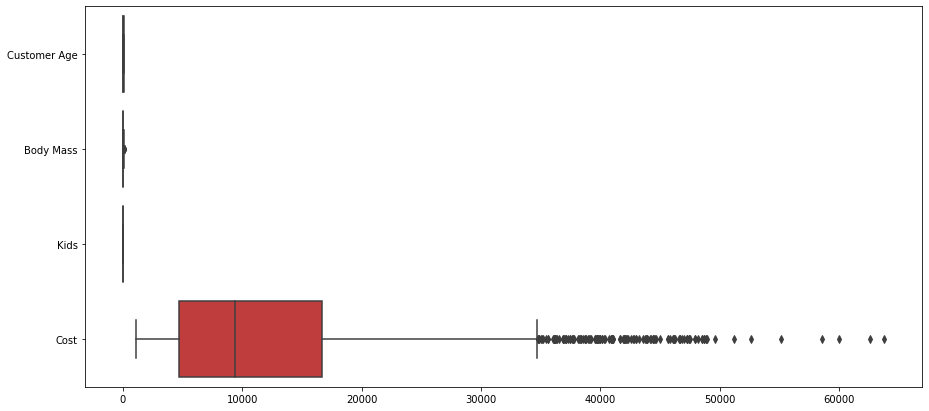

In [47]:
## Visualising the data with Outliers
fig = plt.figure(figsize=(15,7))
ax = sns.boxplot(data=df2.iloc[:,:],orient='h')

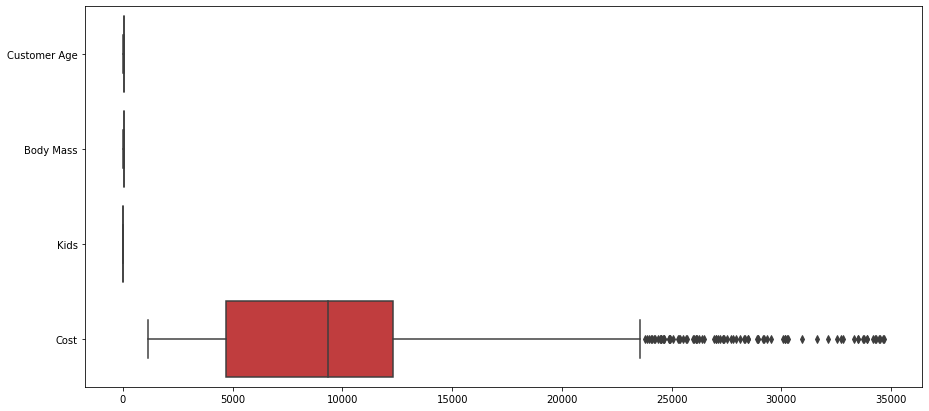

In [48]:
## Visualising the data without Outliers
fig = plt.figure(figsize=(15,7))
ax = sns.boxplot(data=df2_copy.iloc[:,:],orient='h')

(array([1064.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         271.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

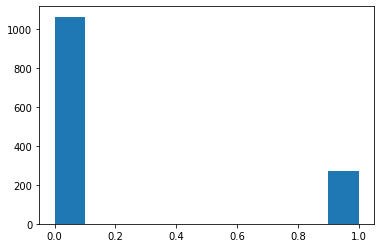

In [49]:
#Step 7:  Distribution of every categorical features:
# sns.distplot(df1['Is he smoker'],color = 'green',fit = scipy_stats.norm)
plt.hist(df_new["Is he smoker"])

In [50]:
## Checking if the data is imbalanced
df1["Is he smoker"].value_counts()
# This is a imbalanced data- SMOTE transformation should be performed to make it balanced

0    1064
1     271
Name: Is he smoker, dtype: int64

In [51]:
df_new.head()

,Customer Age,Gender,Body Mass,Kids,Is he smoker,Regional Info,Cost
0,19,female,27.900,0.0,1,southwest,16884.92400
1,18,male,33.770,1.0,0,southeast,1725.55230
2,28,male,33.000,3.0,0,southeast,4449.46200
3,33,male,22.705,0.0,0,northwest,21984.47061
4,32,male,28.880,0.0,0,northwest,3866.85520


(array([649.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 686.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

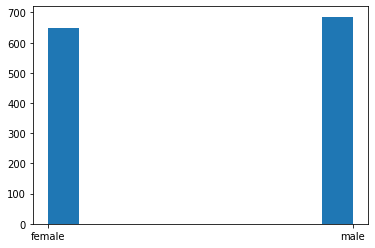

In [52]:
#sns.distplot(df_new['Gender'],color = 'green',fit = scipy_stats.norm)
#df_new.info()
#df_new['Gender'] = df_new['Gender'].astype(int)
#df_new[df_new['Gender'] == "female"]
plt.hist(df_new['Gender'])

In [53]:
df1["Gender_female"].value_counts()

0    686
1    649
Name: Gender_female, dtype: int64

In [54]:
df1["Gender_male"].value_counts()

1    686
0    649
Name: Gender_male, dtype: int64

In [55]:
## The "Gender" feature will not require any kind of balancing of the values since it is already balanced and are almost equal

(array([324.,   0.,   0., 366.,   0.,   0., 323.,   0.,   0., 322.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

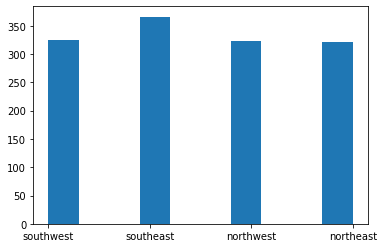

In [56]:
plt.hist(df_new['Regional Info'])

In [57]:
df1["Regional Info_northeast"].value_counts()

0    1013
1     322
Name: Regional Info_northeast, dtype: int64

In [58]:
df1["Regional Info_northwest"].value_counts()

0    1012
1     323
Name: Regional Info_northwest, dtype: int64

In [59]:
df1["Regional Info_southwest"].value_counts()

0    1011
1     324
Name: Regional Info_southwest, dtype: int64

In [60]:
df1["Regional Info_southeast"].value_counts()

0    969
1    366
Name: Regional Info_southeast, dtype: int64

In [61]:
## The "Regional Info" feature will not require any kind of balancing of the values since it is already balanced and are almost equal

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 11 columns):
Customer Age               1335 non-null int32
Body Mass                  1335 non-null float64
Kids                       1335 non-null float64
Is he smoker               1335 non-null int64
Cost                       1335 non-null float64
Gender_male                1335 non-null int32
Gender_female              1335 non-null int32
Regional Info_southeast    1335 non-null int32
Regional Info_southwest    1335 non-null int32
Regional Info_northwest    1335 non-null int32
Regional Info_northeast    1335 non-null int32
dtypes: float64(3), int32(7), int64(1)
memory usage: 78.3 KB


In [63]:
## Step 8: Correlation Study and Cross tabulation

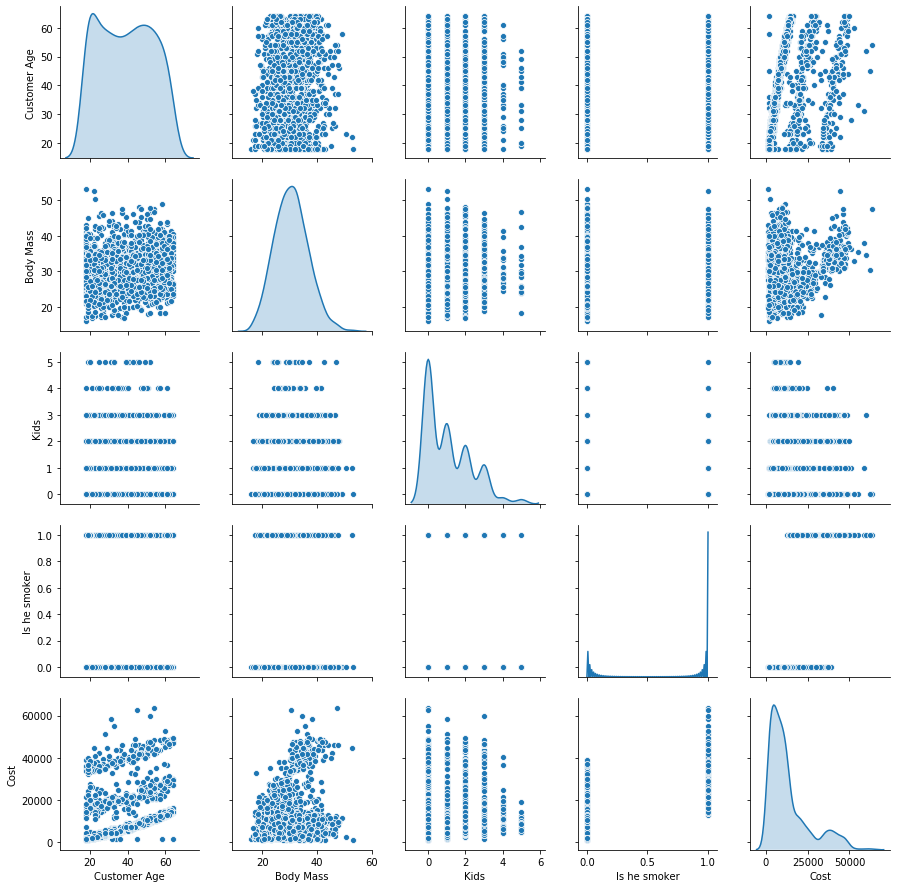

In [64]:
sns.pairplot(df_new,diag_kind='kde')

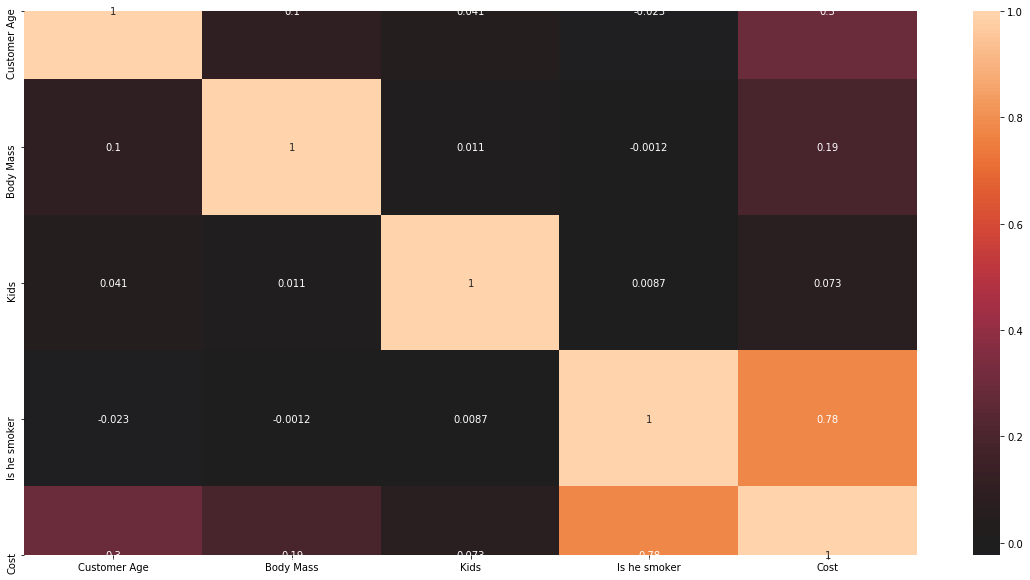

In [65]:
## Correlation matrix
corr_matrix= df_new.corr()
corr_matrix
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix,center = 0,annot=True)

In [66]:
## The following observations can be made from the above pairplots and the correlation matrix heatmap above
## 1.  There is not correlation between smoker and age
## 2. There is a strong correlation between 'Is he smoker' and  'Cost' which means people who smoke incur high medical costs
## 3. The Cost vs CUSTOMER age pairplot shows that the entire distribution can be divided into three clusters 
##     since there are 3 clusters in the distribution
## 4. The Cost vs Kids pairplot shows that more the number of kids, less is the medical cost incurred.


## Hypothesis Testing
### 1:Do charges of people who smoke differs significantly from the people who don't
### 2:Does bmi of males differ significantly from that of females?
### 3:Is the proportion of smokers significantly different in different genders?
### 4:Independenec of Males & Females
### 5:Is the distribution of bmi across women with no children, one child and two children, the same?

In [67]:
## Hypothesis Testing Question 1: Do charges of people who smoke differs significantly from the people who don't
#df_hyp.shape

In [68]:
## 
#df_hyp = df1[["Is he smoker",'Cost']]
#df_hyp2 = df_hyp[df_hyp["Is he smoker"]==1]
#df_hyp2.shape
#round(df_hyp2["Cost"].mean(),0)
#print("Sample mean")

In [69]:
## Define Hypothesis 1:
## H0: There is no significant change in the medical charges of people who smoke
## H1: There is a significant change in the medical charges if people who smoke

In [70]:
stats.ttest_ind(df1["Cost"],df1["Is he smoker"])

Ttest_indResult(statistic=39.8851593782291, pvalue=2.8943073654772362e-273)

In [71]:
## Since P-value is less than 0.05 and t-stat is more than tcritical 2.045 at a = 95%, the null hypothesis can be rejected
## Therefore we can accept the alternate hypothesis 
## and state that There is a significant change in the medical charges if people who smoke

In [72]:
## Hypothesis Testing Question 2: Does bmi of males differ significantly from that of females?

In [73]:
## Define Hypothesis 2:
## H0: There is no significant difference in the BMI of the females from the bmi of the males
## H1: There is a significant change in the BMI of the females from the bmi of the males

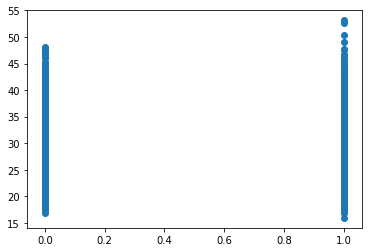

In [74]:
df_new2=df_new.copy()
replace_values = {'Gender': {'male':1 ,'female':0}}
df_new2 = df_new2.replace(replace_values)
df_new2.head()
plt.scatter(df_new2["Gender"],df_new2["Body Mass"])

In [75]:
stats.ttest_ind(df_new2["Body Mass"],df_new2["Gender"])

Ttest_indResult(statistic=181.03371862573755, pvalue=0.0)

In [76]:
## The t-test result shows that p-value isless than 0.05 and the t-stat is greater than 2.403,
## hence the null hypothesis can be rejected and the alternative hypothesis can be accepted
## We can state that There is a significant change in the BMI of the females from the bmi of the males.
## We can see in the plot above that men have a higher BMI than women.

In [77]:
### Hypothesis Question 3:Is the proportion of smokers significantly different in different genders?

In [78]:
## Define Hypothesis 3:
## H0: There is no significant difference in the proportion of smokers across the genders
## H1: There is a significant difference in the proportion of smokers across the genders

In [79]:
from scipy.stats import chisquare
import scipy.stats as stats
from scipy.stats import chi2

In [80]:
df_new2 = df_new2.rename(columns={"Is he smoker":"smoker"})
pd.crosstab(df_new2.Gender,df_new2.smoker)

smoker,0,1
Gender,,
0,537,112
1,527,159


In [81]:
#Contingency table for Gender and Smokes table
observed=pd.crosstab(df_new2.Gender,df_new2.smoker)

In [82]:
#Converting it in an array to perform chi square
observed.values

array([[537, 112],
       [527, 159]], dtype=int64)

In [83]:
val=stats.chi2_contingency(observed)
val

(6.864050294031598,
 0.00879469765237062,
 1,
 array([[517.25543071, 131.74456929],
        [546.74456929, 139.25543071]]))

In [88]:
expected=val[3]
expected

array([[517.25543071, 131.74456929],
       [546.74456929, 139.25543071]])

In [92]:
#Degree of freedom=DOF
#Dof=(df_new2.shape(1)-1)*(df_new2.shape(0)-1)
#print("Degree of freedom =",Dof)
#print("Critical value =",'3.841')

In [93]:
## Since p-value is less than 0.05 and tstat is more than t critical, we can reject the null hypothesis and conclude that 
## There is a significant difference in the proportion of smokers across the genders

(array([1064.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         271.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

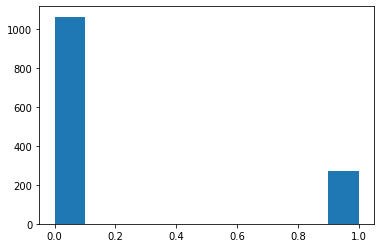

In [94]:
#plt.hist(df_new2["Gender"])
plt.hist(df_new2["smoker"])

In [95]:
## Hypothesis Question 5: Is the distribution of bmi across women with no children, one child and two children, the same?

In [96]:
## Define Hypothesis 5:
## H0: Null Hypothesis: The distribution of BMI across women with no children,one child and two children are the same
## H1: Alternate Hypothesis: The distribution of BMI across women with no children,one child and two children are not the same.

In [97]:
df_new2.head()

,Customer Age,Gender,Body Mass,Kids,smoker,Regional Info,Cost
0,19,0,27.900,0.0,1,southwest,16884.92400
1,18,1,33.770,1.0,0,southeast,1725.55230
2,28,1,33.000,3.0,0,southeast,4449.46200
3,33,1,22.705,0.0,0,northwest,21984.47061
4,32,1,28.880,0.0,0,northwest,3866.85520


In [98]:
df_new3 = df_new2[df_new2["Gender"] == 0]

In [99]:
# df_new3 = df_new3["Customer Age","Gender","BMI","Kids","Is he smoker","Regional Info","Cost"]
df_new3 = df_new3.rename(columns={"Body Mass":"BMI"})
df_new3.head()

,Customer Age,Gender,BMI,Kids,smoker,Regional Info,Cost
0,19,0,27.90,0.0,1,southwest,16884.92400
5,31,0,25.74,0.0,0,southeast,3756.62160
6,46,0,33.44,1.0,0,southeast,8240.58960
7,37,0,27.74,3.0,0,northwest,7281.50560
9,60,0,25.84,0.0,0,northwest,28923.13692


In [100]:
zero = df_new3[df_new3["Kids"]==0]
one = df_new3[df_new3["Kids"]==1]
two = df_new3[df_new3["Kids"]==2]

In [101]:
## Performing Anova test to compare the multiple samples of data and find out if the H0 hold true and good

In [102]:
from scipy.stats import f_oneway
import scipy.stats as stats

In [103]:
value = stats.f_oneway(zero.BMI,one.BMI,two.BMI)

In [104]:
stats.f_oneway(zero.BMI,one.BMI,two.BMI)

F_onewayResult(statistic=0.5308352384051156, pvalue=0.5884145523486193)

In [105]:
if value[1] > 0.05:
    print("Accept null Hypo :the distribution of bmi across women with no children, one child and two children is the same")
else:
    print("Reject Null Hypo")

Accept null Hypo :the distribution of bmi across women with no children, one child and two children is the same
